Prints many statements at same time using the below command

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# Importing the required Libraries

In [74]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas_profiling
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

In [58]:
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score

# Reading the CSV file from the machine

In [4]:
data=pd.read_csv("D:\Module3_RP\Session2\Churn.csv",)

In [5]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Dummy Coding

Assigning numerical codes to the categorical data; below code looks for the column with OBJECT datatype, and assign the codes

In [10]:
#Dummy coding using loop structure
for col in data.columns:
    if data[col].dtype=='object':
        data[col]=pd.Categorical(data[col]).codes

In [12]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


Removing the Columns Customer ID, since it is not infuencing on Churners Rate and Total Charges, since its datatype is  getting identified as Object

In [13]:
data1=data.drop(['TotalCharges','customerID'],axis=1)

In [14]:
data1.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
gender              7043 non-null int8
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int8
Dependents          7043 non-null int8
tenure              7043 non-null int64
PhoneService        7043 non-null int8
MultipleLines       7043 non-null int8
InternetService     7043 non-null int8
OnlineSecurity      7043 non-null int8
OnlineBackup        7043 non-null int8
DeviceProtection    7043 non-null int8
TechSupport         7043 non-null int8
StreamingTV         7043 non-null int8
StreamingMovies     7043 non-null int8
Contract            7043 non-null int8
PaperlessBilling    7043 non-null int8
PaymentMethod       7043 non-null int8
MonthlyCharges      7043 non-null float64
Churn               7043 non-null int8
dtypes: float64(1), int64(2), int8(16)
memory usage: 275.2 KB


# Exploratory Data Analysis Report of the given data:

In [16]:
eda_report = pandas_profiling.ProfileReport(data1)
eda_report.to_file("data1_eda.html")

# Creating Features and Labels

Lables/Dependent Variable: CHURN

Features/Independent Variables: All Columns other than CHURN

In [20]:
x=data1.drop('Churn',axis=1)
y=data1['Churn']

In [21]:
x.head(5)
y.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int8

# Split Train and Test Data

Train Data=75% Test Data=25%

In [24]:

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=1)

In [25]:
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(5282, 18)

(5282,)

(1761, 18)

(1761,)

# Instatiate the model

Here the data is categorical data and we are trying to predict the probablity of a customer churning. Hence we will be performing logistics regression. And since there are only twp possibility of a cutomer being a churner or not a churner therefore Binomial Logistic Regression 

In [28]:

from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()

# Fitting the Train Dataset into the model

In [29]:

lm.fit(train_x,train_y)

C:\Users\sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Implementing the model to test data

Predicting the label variable for the test data, Predict_test is the new column added to X

In [30]:

predict_test=lm.predict(test_x)

Extracting the Coefficients of the respective features for the created model.

In [31]:

print(lm.coef_)

[[-0.00801107  0.24170286  0.05320715 -0.09446304 -0.03609807 -0.90301666
   0.09424371  0.24915069 -0.26043632 -0.1246404  -0.09785369 -0.24362926
   0.00212574  0.03318368 -0.64467767  0.32791677  0.04828335  0.02828557]]


To display the Coefficients and along with the Features name.

Here in the below code , we are concatnating two columns from two different dataframes

In [39]:
df_m=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(lm.coef_))],axis=1)


In [41]:
df_m.columns=("Variables","Coeff")
df_m.sort_values('Variables',ascending=True)

,Variables,Coeff
14,Contract,-0.644678
3,Dependents,-0.094463
10,DeviceProtection,-0.097854
7,InternetService,0.249151
17,MonthlyCharges,0.028286
6,MultipleLines,0.094244
9,OnlineBackup,-0.124640
8,OnlineSecurity,-0.260436
15,PaperlessBilling,0.327917
2,Partner,0.053207


In [70]:
#Generate Model Diagnostics
classes=lm.predict(test_x)
print(classes.size)
print('Positive Cases in test data:',test_y[test_y==1].shape[0])
print('Negative Cases in test data:',test_y[test_y==0].shape[0])

1761
Positive Cases in test data: 434
Negative Cases in test data: 1327


According to the Actual Dataset,there are 434 Churners and 1327 Non-churners

In [69]:
# predicted Y
classes
print(classes.size)
print('Positive Cases in predicted data:',classes[classes==1].shape[0])
print('Negative Cases in predicted data:',classes[classes==0].shape[0])

array([0, 0, 0, ..., 0, 1, 0], dtype=int8)

1761
Positive Cases in predicted data: 396
Negative Cases in predicted data: 1365


According to the model,there are 396 Churners and 1365 Non-churners

In [60]:
#precision and Recall
print('Accuracy Score')
print(metrics.accuracy_score(test_y,classes))
print('Precision/Recall Metrics')
print(metrics.classification_report(test_y,classes))
print('AUC')
auc=metrics.roc_auc_score(test_y,classes)
auc

Accuracy Score
0.80465644520159
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1327
           1       0.61      0.56      0.59       434

   micro avg       0.80      0.80      0.80      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.80      0.80      0.80      1761

AUC


0.7223050850989203

The model is 80% accurate in predicting the Churners and Non-Churners when compared with the actual data

 The model has recalled/predicted 56% of Churners correctly, among the 434 actual Churners

The model has recalled/predicted 88% of Non-Churners correctly, among the 1327 actual Non-Churners

The model  is 61% precise in predicting the Churners correclty among all its predicted churners 

The model is 86% precise in predicting the Non-Churners correclty among all its predicted Non-Churners

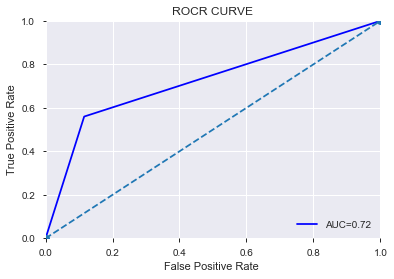

In [75]:
# ROC chart
fpr,tpr,th=roc_curve(test_y,classes)
roc_auc=metrics.auc(fpr,tpr)
plt.title('ROCR CURVE')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate ')
plt.show();

# Confusion Martix and its Insights

Confusion Matrix


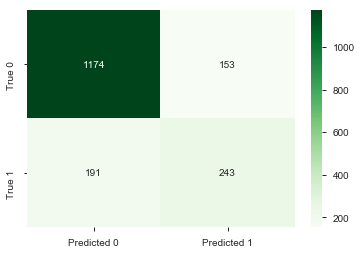

In [76]:
# confusion matrix
print('Confusion Matrix')
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf, annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

# True Positive= 243

The model has predicted 243 as Churners and they are actually Churners according the real dataset.

# True Negative=1174

The model has predicted 1174 as Non-Churners and they are actually Non-Churners according the real dataset.

# False Positive=153

The model has predicted 153 as Churners but they are actually Non-Churners according the real dataset.

# False Negative=191

The model has predicted 191 as Non-Churners but they are actually Churners according to real dataset